# Exploration des données concernant le café

In [1]:
import pandas as pd
from datetime import *
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


%matplotlib inline

In [2]:
# Read the CSV file (utf-8 encoded)
df = pd.read_csv('./data/DataRisaralda_v2_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')

Tableaux de colonnes, utile pour grouper

In [3]:
cols = ['Malla 17-18','Malla 14-16','Malla <13','Negros y vinagres','Broca','Broca de punto','Veteado','Mordido',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo','Conchas',
         'Partido','Ambar','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total',
         'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10','tmin1','tmin2','tmin3','tmin4','tmin5',
         'tmin6','tmin7','tmin8','tmin9','tmin10','tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
         'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10','dtr1','dtr2','dtr3','dtr4',
         'dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

# Information sur les scores des tasses par année

In [4]:
PuntajeTotal_groupby_year = df['Puntaje Total'].groupby(df['year'])

PuntajeTotal_groupby_year.describe()

year       
2011  count    351.000000
      mean      65.525997
      std       30.520292
      min        0.000000
      25%       75.625000
      50%       79.000000
      75%       82.000000
      max       85.500000
2016  count    412.000000
      mean      78.928932
      std        8.702288
      min        0.000000
      25%       78.000000
      50%       81.750000
      75%       84.000000
      max       87.750000
Name: Puntaje Total, dtype: float64

## Répartition du total de points pour les années 2011 et 2016

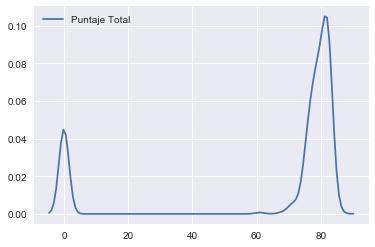

In [5]:
foo = df.ix[(df['year']==2011) ]

sns.kdeplot(foo['Puntaje Total'])

In [ ]:
foo = df.ix[(df['year']==2016) ]

sns.kdeplot(foo['Puntaje Total'])

# Analyse de l'occurence des cafés

Combien de fois un café revient-il entre les années ?

L'élimination des doublons s'est faite sur le numéro SICA et la date de test.

In [23]:
# Certains cafés on été testés plusieurs fois, parfois même 2 fois dans la même année mais à plusieurs mois d'interval. 

dfOccurences = df['SICA 1'].value_counts().to_frame(name='Occurence')

SICAOcc1 = []
SICAOcc2 = []
SICAOcc3 = []

for index, row in dfOccurences.iterrows():
    #print str(int(index)) , row.Occurence
    if row.Occurence == 1:
        SICAOcc1.append(index)
    elif row.Occurence == 2: 
        SICAOcc2.append(index)
    elif row.Occurence == 3:
        SICAOcc3.append(index)
print "Nombre avec 3 occurences" , len(SICAOcc3)
print "Nombre avec 2 occurences" , len(SICAOcc2)
print "Nombre avec 1 occurences" , len(SICAOcc1)


Nombre avec 3 occurences 6
Nombre avec 2 occurences 59
Nombre avec 1 occurences 631


In [ ]:
# On enlève Mordido, conchas et ambar et les Malla -> pas présent partout
coffee = ['Negros y vinagres','Broca','Broca de punto','Veteado',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
         'Partido','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total']

In [ ]:
# Some coffee have missing datas in the notation (points) (they are bad)
dftmp = df[coffee].dropna(axis=1, how='any')

mat = np.array(dftmp)

#print numpy.isnan(mat).any()


#print np.argwhere(np.isnan(mat))
       
#print mat

mlab_pca = mlabPCA(mat)

#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:488,0],mlab_pca.Y[0:488,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][40])
plt.plot(mlab_pca.Y[488:1098,0], mlab_pca.Y[488:1098,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [ ]:
df.boxplot('Puntaje Total', 'year')

In [ ]:
ax = sns.boxplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['red','blue','green'], orient='v')



In [ ]:
bx = sns.swarmplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['red','blue','green'], orient='v')


In [ ]:
bx = sns.swarmplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['blue','green'], orient='v')